# Alternation index

In [19]:
import sys

sys.path.append('../src')

In [20]:
from Utils.indices import AlternationIndex

In [21]:
index_gen = AlternationIndex(
    num_points=20,
    num_episodes=20,
    max_agents=8,
    max_epsilon=0.01,
    seed=42
)

In [22]:
df = index_gen.simulate_data()

Running configurations for alternation:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/20 [00:00<?, ?it/s]

Running configurations for segmentation:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running configurations for random:   0%|          | 0/20 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

Running episodes:   0%|          | 0/10 [00:00<?, ?it/s]

In [23]:
df = index_gen.data
df.head()

,threshold,id_sim,num_agents,bounded_efficiency,inequality,epsilon,data_type
0,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,1.000000,5.995890e-17,0.005556,alternation
1,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,0.888889,4.761905e-02,0.005556,alternation
2,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,1.000000,5.995890e-17,0.005556,alternation
3,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,0.984127,1.799831e-02,0.005556,alternation
4,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,0.888889,4.761905e-02,0.005556,alternation


In [24]:
index_gen.create_index_sklearn()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88
           1       1.00      1.00      1.00        72

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Saved sklearn coefficients to /Users/edgar/Repositorios/Cognitive_Models_El_Farol_Bar_Problem/data/indices/sklearn_coefficients.csv


,measure,coefficient
0,intercept,-0.306723
1,bounded_efficiency,3.311620
2,inequality,-9.529224


In [25]:
index_gen.create_index_statsmodels()

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Apr 2025   Pseudo R-squ.:                   1.000
Time:                        15:39:53   Log-Likelihood:            -7.8225e-07
converged:                      False   LL-Null:                       -554.52
Covariance Type:            nonrobust   LLR p-value:                1.500e-241
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -20.8851   8.74e+04     -0.000      1.000   -1.71e+05    1.71e+05
bounded_efficiency    68.4754   1.26e+05      0.001      1.000   -2.47e+05    2.47e+05
inequality 

/Users/edgar/venv_repositorios/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,measure,coefficient
0,intercept,-20.885141
1,bounded_efficiency,68.475350
2,inequality,-170.733589


In [26]:
index_gen1 = AlternationIndex.from_file(priority='sklearn')

In [27]:
df['gen1'] = index_gen1(df)

In [28]:
index_gen2 = AlternationIndex.from_file(priority='statsmodels')

In [29]:
df['gen2'] = index_gen2(df)

In [30]:
df.head()

,threshold,id_sim,num_agents,bounded_efficiency,inequality,epsilon,data_type,target,gen1,gen2
0,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,1.000000,5.995890e-17,0.005556,alternation,1,0.952795,1.0
1,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,0.888889,4.761905e-02,0.005556,alternation,1,0.898728,1.0
2,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,1.000000,5.995890e-17,0.005556,alternation,1,0.952795,1.0
3,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,0.984127,1.799831e-02,0.005556,alternation,1,0.941631,1.0
4,0.428571,7-0.42857142857142855-0.005555555555555556-alt...,7,0.888889,4.761905e-02,0.005556,alternation,1,0.898728,1.0


<Axes: title={'center': 'statsmodels'}, xlabel='Data Type', ylabel='Alternation Index'>

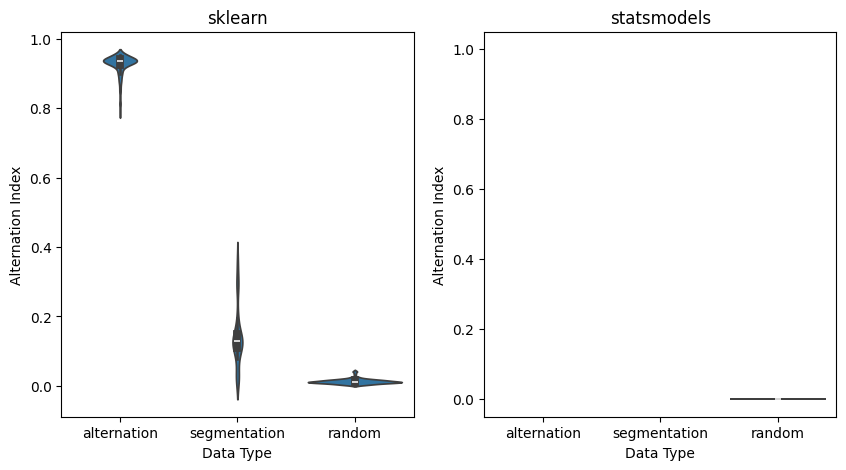

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.violinplot(
    data=df,
    x='data_type',
    y='gen1',
    ax=ax[0],
)
ax[0].set_title('sklearn')
ax[0].set_xlabel('Data Type')
ax[0].set_ylabel('Alternation Index')
ax[1].set_title('statsmodels')
ax[1].set_xlabel('Data Type')
ax[1].set_ylabel('Alternation Index')
sns.violinplot(
    data=df,
    x='data_type',
    y='gen2',
    ax=ax[1],
)

In [32]:
df[(df['data_type'] == 'alternation') & (df['gen1'] < 0.5)]

,threshold,id_sim,num_agents,bounded_efficiency,inequality,epsilon,data_type,target,gen1,gen2


In [33]:
df[(df['data_type'] == 'segmentation') & (df['gen1'] > 0.5)]

,threshold,id_sim,num_agents,bounded_efficiency,inequality,epsilon,data_type,target,gen1,gen2


In [34]:
df[(df['data_type'] == 'random') & (df['gen2'] > 0.5)]

,threshold,id_sim,num_agents,bounded_efficiency,inequality,epsilon,data_type,target,gen1,gen2


In [35]:
import pandas as pd

conditional_entropy = 0.2
entropy = 0.8
efficiency = 0.1
bounded_efficiency = 0.1 / 0.5
inequality = 0.1
df_test = pd.DataFrame({
    'bounded_efficiency': [bounded_efficiency],
    # 'entropy': [entropy],
    # 'conditional_entropy': [conditional_entropy],
    'inequality': [inequality]
})
print(df_test)
print(f'Alternation index skelarn: {index_gen1(df_test)}')
print(f'Alternation index statsmodels: {index_gen2(df_test)}')

   bounded_efficiency  inequality
0                    0.2         0.1
Alternation index skelarn: [0.35495667]
Alternation index statsmodels: [2.90085554e-11]


# Plot alternation index

In [36]:
from Classes.cognitive_model_agents import MFPM1, MFPM2, MFPM3
from Utils.interaction import Experiment

from pathlib import Path

In [40]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":4,
}
free_parameters = {
	"inverse_temperature":16,
    "belief_strength":1
}
simulation_parameters = {
	'num_episodes':30,
	'num_rounds':500,
	'verbose':False
}

In [38]:
image_folder_M1 = Path('../images/MFP/M1')

agent_class = MFPM1
measures = [
    'efficiency', 'inequality', 'entropy', 
    'conditional_entropy', 'alternation_index'
]
sweep_parameter = 'inverse_temperature'
values = [2, 4, 8, 16, 32]

experiment = Experiment(
    agent_class=agent_class,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    measures=measures
)
kwargs_ = {
    'x_label':sweep_parameter,
    'only_value':True,
    'title_size':16,
    'x_label_size':14,
    'y_label_size':14,
}
experiment.run_sweep1(
    parameter=sweep_parameter,
    values=values,
    folder_plots=image_folder_M1,
    kwargs=kwargs_
)

Running models for each inverse_temperature:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Plotting efficiency...
Plot saved to ../images/MFP/M1/efficiency_inverse_temperature.png
Plotting inequality...
Plot saved to ../images/MFP/M1/inequality_inverse_temperature.png
Plotting entropy...
Plot saved to ../images/MFP/M1/entropy_inverse_temperature.png
Plotting conditional_entropy...
Plot saved to ../images/MFP/M1/conditional_entropy_inverse_temperature.png
Plotting alternation_index...
Plot saved to ../images/MFP/M1/alternation_index_inverse_temperature.png


In [41]:
image_folder_M3 = Path('../images/MFP/M3')

agent_class = MFPM3
measures = [
    'efficiency', 'inequality', 'entropy', 
    'conditional_entropy', 'alternation_index'
]
sweep_parameter = 'inverse_temperature'
values = [2, 4, 8, 16, 32]

experiment = Experiment(
    agent_class=agent_class,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    measures=measures
)
kwargs_ = {
    'x_label':sweep_parameter,
    'only_value':True,
    'title_size':16,
    'x_label_size':14,
    'y_label_size':14,
}
experiment.run_sweep1(
    parameter=sweep_parameter,
    values=values,
    folder_plots=image_folder_M3,
    kwargs=kwargs_
)

Running models for each inverse_temperature:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Plotting efficiency...
Plot saved to ../images/MFP/M3/efficiency_inverse_temperature_1.png
Plotting inequality...
Plot saved to ../images/MFP/M3/inequality_inverse_temperature_1.png
Plotting entropy...
Plot saved to ../images/MFP/M3/entropy_inverse_temperature_1.png
Plotting conditional_entropy...
Plot saved to ../images/MFP/M3/conditional_entropy_inverse_temperature_1.png
Plotting alternation_index...
Plot saved to ../images/MFP/M3/alternation_index_inverse_temperature_1.png
